In [134]:
import pandas as pd

file_path =  r"C:\Users\Coditas\Desktop\Projects\Cauti\silver\bronze_columns_filtered.csv"

df = pd.read_csv(file_path)
df.head()

,subject_id,hadm_id,admittime,dischtime,gender,anchor_age,admission_type,admission_location,discharge_location,race,...,resp_rate,o2sat,BP_systolic,BP_diastolic,other_uti,other_uti_present,has_cauti_history,pain_documented,ventilator_used,y
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,F,52,URGENT,TRANSFER FROM HOSPITAL,HOME,WHITE,...,16.0,98.0,110.0,65.0,[],False,False,True,False,0
1,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,F,52,EW EMER.,EMERGENCY ROOM,HOME,WHITE,...,24.0,92.0,98.0,66.0,[],False,False,True,True,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,F,52,EW EMER.,EMERGENCY ROOM,HOSPICE,WHITE,...,18.0,99.0,98.0,66.0,[],False,False,True,True,0
3,10000560,28979390,2189-10-15 10:30:00,2189-10-17 15:00:00,F,53,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,WHITE,...,NaN,NaN,104.0,68.0,[],False,False,True,False,0
4,10000690,25860671,2150-11-02 18:02:00,2150-11-12 13:45:00,F,86,EW EMER.,EMERGENCY ROOM,REHAB,WHITE,...,35.0,83.0,130.0,68.0,[],False,False,False,False,0


In [135]:
continuous_features = [
 'anchor_age',
 'BMI',
 'charlson_score',
 'length_of_stay',
 'num_of_transfers',
 'urinalysis_wbc',
 'urinalysis_rbc',
 'blood_wbc',
 'creatinine',
 'blood_crp',
 'urine_output_ml',
 'cfu_count',
 'temperature',
 'heart_rate',
 'resp_rate',
 'o2sat',
 'BP_systolic',
 'BP_diastolic']

In [136]:
outlier_summary = []

for col in continuous_features:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

,feature,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count
0,anchor_age,52.000000,76.00,24.000000,16.000000,112.000000,0
1,BMI,23.200000,31.90,8.700000,10.150000,44.950000,3710
2,charlson_score,2.000000,7.00,5.000000,-5.500000,14.500000,1063
3,length_of_stay,2.660000,8.82,6.160000,-6.580000,18.060000,12906
4,num_of_transfers,3.000000,5.00,2.000000,0.000000,8.000000,5387
5,urinalysis_wbc,2.000000,30.00,28.000000,-40.000000,72.000000,5742
6,urinalysis_rbc,2.000000,23.00,21.000000,-29.500000,54.500000,6532
7,blood_wbc,7.900000,15.70,7.800000,-3.800000,27.400000,6571
8,creatinine,0.800000,1.60,0.800000,-0.400000,2.800000,15861
9,blood_crp,17.500000,146.40,128.900000,-175.850000,339.750000,7


## anchor_age outlier detection

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_box_and_outliers(df, feature):
    """Plots a boxplot and prints outliers using IQR. Also returns list of outlier values."""
    
    # --- Boxplot ---
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.show()

    # --- IQR Outlier Detection ---
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower) | (df[feature] > upper)][feature]

    print(f"\n🔍 Outlier Summary for **{feature}**")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower}")
    print(f"Upper Bound: {upper}")
    print(f"\nTotal Outliers: {len(outliers)}")

    print("\n📌 Outlier Values (Series):")
    display(outliers)

    # Convert to Python list
    outlier_list = outliers.tolist()

    print("\n📌 Outlier Values (Python List):")
    print(outlier_list)

    return outlier_list


In [139]:
outliers_age = df[(df["anchor_age"] < 0) | (df["anchor_age"] > 120)]["anchor_age"]
outliers_age.tolist()

[]

## BMI outliers

In [141]:
import pandas as pd
import numpy as np

# Ensure BMI is numeric
df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")

bmi = df["BMI"].dropna()  # Work only with non-NaN numeric values

# 1. Detect extremely large corrupted values (≥200 means suspicious)
large_corrupted = bmi[bmi >= 200]

# 2. Detect extremely small corrupted values (<10 means suspicious)
small_corrupted = bmi[bmi < 10]

# 3. Check if all values lie between 10 and 100
within_range = bmi[(bmi >= 10) & (bmi <= 100)]
values_outside_10_100 = bmi[(bmi < 10) | (bmi > 100)]

# 4. Detect decimal-shift error patterns explicitly
decimal_shift_candidates = bmi[
    (bmi >= 200) |     # like 424.4, 500, 700
    (bmi >= 2000) |    # like 4371, etc.
    (bmi < 10)         # like 3.5, 0.2, 8.5
]

# ------------------------------
# PRINT SUMMARY
# ------------------------------

print("===== BMI CORRUPTION CHECK =====")

print("\n1️⃣ Large corrupted BMI values (>=200):")
print(large_corrupted.tolist() if len(large_corrupted) else "None found ✔")

print("\n2️⃣ Small corrupted BMI values (<10):")
print(small_corrupted.tolist() if len(small_corrupted) else "None found ✔")

print("\n3️⃣ Values outside physiologic range [10, 100]:")
print(values_outside_10_100.tolist() if len(values_outside_10_100) else "None found ✔")

print("\n4️⃣ Decimal-shift suspect values (>=200 or <10 or >=2000):")
print(decimal_shift_candidates.tolist() if len(decimal_shift_candidates) else "None found ✔")

print("\n===== FINAL CONCLUSION =====")
if len(decimal_shift_candidates) == 0:
    print("✔ No corrupted BMI values detected")
else:
    print("⚠ Some BMI values may be corrupted — inspect above lists.")


===== BMI CORRUPTION CHECK =====

1️⃣ Large corrupted BMI values (>=200):
[4432.8, 3258.0, 3124.4, 3513.6, 3400.7, 5000.2, 4029.8, 4194.2, 3615.3, 3096.1, 3096.1, 5012.9, 3278.8, inf, 3264.8, 2338.9, 2338.9, 222.3, 3610.9, 4171.5, 6102.0, 6102.0, 328.2, 328.2, 328.2, 328.2, 328.2, 328.2, 328.2, 328.2, 328.2, 4371.3, 245.0, 5394.7, 5394.7, 703.0, 318.8, 3158.6, 4232.0, 4232.0, 4232.0, 351.5, 424.4, 4465.5, 3639.8, 4951.5, 5526.4, 3344.0, 107840.2, 107840.2, 107840.2, 2936.0, 3345.6, 3345.6, 1335.05, 1303.4, 4114.35, 14690.8]

2️⃣ Small corrupted BMI values (<10):
[9.4, 8.5, 6.7, 8.2, 4.0, 4.0, 0.0, 9.1, 3.5, 4.1, 9.1, 0.3, 3.4, 2.2, 8.5, 9.8, 0.0, 2.1, 2.1, 9.7, 9.7, 9.7, 3.0, 4.7, 0.1, 4.9, 0.2, 0.4, 4.8, 9.5, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 0.0, 8.9, 3.8, 7.7, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 3.4, 0.0, 5.1, 5.1, 0.7, 7.1, 9.1, 9.1, 0.4, 0.2, 4.9, 4.8, 8.4, 0.2, 9.0, 9.0, 9.9, 5.9, 3.0, 4.0, 0.4, 9.5, 9.6, 3.5, 0.4, 8.3, 8.3, 8.3, 8.3, 8.3, 2.5, 3.6, 

In [142]:
# Ensure BMI is numeric
df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")

# Define physiologically plausible adult BMI range
BMI_MIN = 10
BMI_MAX = 100

# Replace corrupted BMI values with NaN
df.loc[
    (df["BMI"] < BMI_MIN) |        # too small
    (df["BMI"] > BMI_MAX) |        # too large
    (~np.isfinite(df["BMI"])),     # inf, -inf
    "BMI"
] = np.nan

In [143]:
import pandas as pd
import numpy as np

# Ensure BMI is numeric
df["BMI"] = pd.to_numeric(df["BMI"], errors="coerce")

bmi = df["BMI"].dropna()  # Work only with non-NaN numeric values

# 1. Detect extremely large corrupted values (≥200 means suspicious)
large_corrupted = bmi[bmi >= 200]

# 2. Detect extremely small corrupted values (<10 means suspicious)
small_corrupted = bmi[bmi < 10]

# 3. Check if all values lie between 10 and 100
within_range = bmi[(bmi >= 10) & (bmi <= 100)]
values_outside_10_100 = bmi[(bmi < 10) | (bmi > 100)]

# 4. Detect decimal-shift error patterns explicitly
decimal_shift_candidates = bmi[
    (bmi >= 200) |     # like 424.4, 500, 700
    (bmi >= 2000) |    # like 4371, etc.
    (bmi < 10)         # like 3.5, 0.2, 8.5
]

# ------------------------------
# PRINT SUMMARY
# ------------------------------

print("===== BMI CORRUPTION CHECK =====")

print("\n1️⃣ Large corrupted BMI values (>=200):")
print(large_corrupted.tolist() if len(large_corrupted) else "None found ✔")

print("\n2️⃣ Small corrupted BMI values (<10):")
print(small_corrupted.tolist() if len(small_corrupted) else "None found ✔")

print("\n3️⃣ Values outside physiologic range [10, 100]:")
print(values_outside_10_100.tolist() if len(values_outside_10_100) else "None found ✔")

print("\n4️⃣ Decimal-shift suspect values (>=200 or <10 or >=2000):")
print(decimal_shift_candidates.tolist() if len(decimal_shift_candidates) else "None found ✔")

print("\n===== FINAL CONCLUSION =====")
if len(decimal_shift_candidates) == 0:
    print("✔ No corrupted BMI values detected")
else:
    print("⚠ Some BMI values may be corrupted — inspect above lists.")


===== BMI CORRUPTION CHECK =====

1️⃣ Large corrupted BMI values (>=200):
None found ✔

2️⃣ Small corrupted BMI values (<10):
None found ✔

3️⃣ Values outside physiologic range [10, 100]:
None found ✔

4️⃣ Decimal-shift suspect values (>=200 or <10 or >=2000):
None found ✔

===== FINAL CONCLUSION =====
✔ No corrupted BMI values detected


## Charlson Score Outliers

In [145]:
invalid_charlson = df[(df["charlson_score"] < 0) | (df["charlson_score"] > 35)]
invalid_charlson

,subject_id,hadm_id,admittime,dischtime,gender,anchor_age,admission_type,admission_location,discharge_location,race,...,resp_rate,o2sat,BP_systolic,BP_diastolic,other_uti,other_uti_present,has_cauti_history,pain_documented,ventilator_used,y


## Length of Stays Outliers

In [147]:
los = pd.to_numeric(df["length_of_stay"], errors="coerce")

neg = df[los < 0][["length_of_stay"]]
high = df[los > 1000][["length_of_stay"]]

print("length_of_stay < 0 :", len(neg))
print("Indices:", neg.index.tolist())
print("Values :", neg["length_of_stay"].tolist(), "\n")

print("length_of_stay > 1000 :", len(high))
print("Indices:", high.index.tolist())
print("Values :", high["length_of_stay"].tolist())

length_of_stay < 0 : 65
Indices: [781, 4025, 4400, 7549, 7986, 8346, 15635, 16058, 18509, 19213, 21851, 22407, 25965, 29603, 31274, 33265, 34808, 35743, 36994, 38950, 48274, 52121, 53123, 55385, 57522, 59747, 60786, 60833, 62678, 63762, 69938, 73421, 76607, 79590, 80615, 81672, 82193, 86738, 89621, 89845, 90996, 92051, 92205, 94204, 95098, 97526, 99543, 101949, 107590, 112824, 113693, 118559, 119148, 120237, 122971, 126013, 127946, 141054, 142995, 143952, 146228, 147716, 156117, 156385, 156599]
Values : [-0.03, -0.03, -0.03, -0.21, -0.11, -0.46, -0.78, -0.5, -0.03, -0.05, -0.02, -0.09, -0.95, -0.06, -0.06, -0.27, -0.49, -0.23, -0.43, -0.54, -0.73, -0.52, -0.5, -0.08, -0.12, -0.8, -0.58, -0.36, -0.78, -0.25, -0.07, -0.69, -0.5, -0.59, -0.74, -0.49, -0.64, -0.6, -0.86, -0.7, -0.02, -0.71, -0.16, -0.58, -0.64, -0.48, -0.69, -0.11, -0.07, -0.87, -0.55, -0.11, -0.52, -0.62, -0.79, -0.38, -0.51, -0.7, -0.06, -0.57, -0.08, -0.18, -0.41, -0.62, -0.77] 

length_of_stay > 1000 : 0
Indices: []
Va

In [148]:
df["length_of_stay"] = pd.to_numeric(df["length_of_stay"], errors="coerce")
df.loc[df["length_of_stay"] < 0, "length_of_stay"] = 0

In [149]:
# Convert to numeric
df["length_of_stay"] = pd.to_numeric(df["length_of_stay"], errors="coerce")

# Detect invalid values
neg = df[df["length_of_stay"] < 0][["length_of_stay"]]
high = df[df["length_of_stay"] > 1000][["length_of_stay"]]

print("length_of_stay < 0:", len(neg))
print("Indices:", neg.index.tolist())
print("Values:", neg["length_of_stay"].tolist(), "\n")

print("length_of_stay > 1000:", len(high))
print("Indices:", high.index.tolist())
print("Values:", high["length_of_stay"].tolist())

# --- CLEAN THE COLUMN INSIDE df ---

# Negative values → NaN
df.loc[df["length_of_stay"] < 0, "length_of_stay"] = np.nan

# Extremely high values → cap at 1000
df.loc[df["length_of_stay"] > 1000, "length_of_stay"] = 1000

length_of_stay < 0: 0
Indices: []
Values: [] 

length_of_stay > 1000: 0
Indices: []
Values: []


## Number of Transfers Outliers

In [151]:
transfers = pd.to_numeric(df["num_of_transfers"], errors="coerce")

neg_t = df[transfers < 0][["num_of_transfers"]]
high_t = df[transfers > 100][["num_of_transfers"]]

print("num_of_transfers < 0 :", len(neg_t))
print("Indices:", neg_t.index.tolist())
print("Values :", neg_t["num_of_transfers"].tolist(), "\n")

print("num_of_transfers > 100 :", len(high_t))
print("Indices:", high_t.index.tolist())
print("Values :", high_t["num_of_transfers"].tolist())

num_of_transfers < 0 : 0
Indices: []
Values : [] 

num_of_transfers > 100 : 0
Indices: []
Values : []


## urinalysis wbc Outlier Detection

In [153]:
def categorize_wbc_hpf_value(x):
    if pd.isna(x):
        return "Missing"
    if x <= 5:
        return "Normal"
    elif x <= 10:
        return "Mild Pyuria"
    elif x <= 20:
        return "Moderate Pyuria"
    elif x <= 50:
        return "Infection"
    elif x <= 100:
        return "Severe Pyuria"
    elif x <= 200:
        return "Marked Pyuria"
    elif x <= 500:
        return "Very High (TNTC likely)"
    else:
        return "Extreme / TNTC"


In [154]:
wbc_values = df["urinalysis_wbc"]  # or your list

wbc_categories = [categorize_wbc_hpf_value(x) for x in wbc_values]
from collections import Counter
Counter(wbc_categories)

Counter({'Missing': 110374,
         'Normal': 20022,
         'Infection': 6971,
         'Mild Pyuria': 6433,
         'Moderate Pyuria': 6108,
         'Severe Pyuria': 4353,
         'Marked Pyuria': 3210,
         'Very High (TNTC likely)': 365,
         'Extreme / TNTC': 184})

In [155]:
import numpy as np
import pandas as pd

# Ensure numeric
df["urinalysis_wbc"] = pd.to_numeric(df["urinalysis_wbc"], errors="coerce")

# Invalidate corrupted values
df.loc[
    (df["urinalysis_wbc"] < 0) |
    (df["urinalysis_wbc"] > 500) |
    (~np.isfinite(df["urinalysis_wbc"])),
    "urinalysis_wbc"
] = np.nan


In [156]:
wbc_values = df["urinalysis_wbc"]  # or your list

wbc_categories = [categorize_wbc_hpf_value(x) for x in wbc_values]
from collections import Counter
Counter(wbc_categories)

Counter({'Missing': 110558,
         'Normal': 20022,
         'Infection': 6971,
         'Mild Pyuria': 6433,
         'Moderate Pyuria': 6108,
         'Severe Pyuria': 4353,
         'Marked Pyuria': 3210,
         'Very High (TNTC likely)': 365})

## urinalysis rbc Outlier Detection (HPF measured)

In [158]:
import pandas as pd

rbc = pd.to_numeric(df["urinalysis_rbc"], errors="coerce")

# Condition 1: Negative values
neg_rbc = df[rbc < 0]["urinalysis_rbc"]

# Condition 2: Extremely large values > 5000 OR > 10000
high_rbc = df[(rbc > 5000) | (rbc > 10000)]["urinalysis_rbc"]

print("🔍 RBC < 0 :", len(neg_rbc))
print("Values:", neg_rbc.tolist(), "\n")

print("🔍 RBC > 5000:", len(high_rbc))
print("Values:", high_rbc.tolist())


🔍 RBC < 0 : 0
Values: [] 

🔍 RBC > 5000: 0
Values: []


In [159]:
def categorize_rbc_hpf_value(x):
    if pd.isna(x):
        return "Missing"
    if x <= 5:
        return "Normal"
    elif x <= 10:
        return "Mild microscopic hematuria"
    elif x <= 50:
        return "Moderate hematuria"
    elif x <= 100:
        return "Significant hematuria"
    elif x <= 500:
        return "Severe hematuria"
    elif x <= 1000:
        return "Very severe hematuria (TNTC)"
    else:
        return "Extreme hematuria (TNTC)"

In [160]:
rbc_values = df["urinalysis_rbc"]  # or your list

rbc_categories = [categorize_rbc_hpf_value(x) for x in rbc_values]

from collections import Counter
Counter(rbc_categories)


Counter({'Missing': 109631,
         'Normal': 25015,
         'Moderate hematuria': 10711,
         'Mild microscopic hematuria': 5702,
         'Significant hematuria': 3489,
         'Severe hematuria': 3208,
         'Very severe hematuria (TNTC)': 264})

In [161]:
# Ensure numeric
df["urinalysis_rbc"] = pd.to_numeric(df["urinalysis_rbc"], errors="coerce")

# Replace TNTC / corrupted values with NaN
df.loc[
    (df["urinalysis_rbc"] > 500) |      # TNTC threshold
    (df["urinalysis_rbc"] < 0) |
    (~np.isfinite(df["urinalysis_rbc"])),
    "urinalysis_rbc"
] = np.nan

In [162]:
rbc_values = df["urinalysis_rbc"]  # or your list

rbc_categories = [categorize_rbc_hpf_value(x) for x in rbc_values]

from collections import Counter
Counter(rbc_categories)

Counter({'Missing': 109895,
         'Normal': 25015,
         'Moderate hematuria': 10711,
         'Mild microscopic hematuria': 5702,
         'Significant hematuria': 3489,
         'Severe hematuria': 3208})

## blood_wbc Outlier Detection

In [164]:
import numpy as np

wbc = pd.to_numeric(df["blood_wbc"], errors="coerce")

invalid_neg = wbc[wbc < 0]
invalid_zero = wbc[wbc == 0]
invalid_high = wbc[wbc > 5000]   # physiologically impossible

print("Negative values:", invalid_neg.tolist())
print("Zero values:", invalid_zero.tolist())
print("Extremely high (>5000):", invalid_high.tolist())


Negative values: []
Zero values: []
Extremely high (>5000): [12500.0]


In [165]:
def categorize_blood_wbc(x):
    if pd.isna(x):
        return "Missing"
    elif x < 4:
        return "Low WBC (Leukopenia)"
    elif x <= 11:
        return "Normal"
    elif x <= 20:
        return "Mild Leukocytosis"
    elif x <= 50:
        return "Moderate Leukocytosis"
    elif x <= 100:
        return "Severe Leukocytosis"
    elif x <= 200:
        return "Hyperleukocytosis"
    elif x <= 500:
        return "Critical"
    else:
        return "Extreme"
blood_wbc_values = df["blood_wbc"]

blood_wbc_categories = [categorize_blood_wbc(x) for x in blood_wbc_values]

from collections import Counter
Counter(blood_wbc_categories)

Counter({'Normal': 69437,
         'Mild Leukocytosis': 56363,
         'Moderate Leukocytosis': 17755,
         'Missing': 9898,
         'Low WBC (Leukopenia)': 3684,
         'Severe Leukocytosis': 702,
         'Hyperleukocytosis': 126,
         'Critical': 52,
         'Extreme': 3})

In [166]:
# Convert to numeric in case of strings
bw = pd.to_numeric(df["blood_wbc"], errors="coerce")

# Extreme WBC > 500
extreme_mask = bw > 500

extreme_values = bw[extreme_mask]
extreme_indices = extreme_values.index.tolist()

print("Total extreme blood_wbc values:", len(extreme_values))
print("Indices:", extreme_indices)
print("Values:", extreme_values.tolist())


Total extreme blood_wbc values: 3
Indices: [37557, 95728, 136771]
Values: [12500.0, 884.0, 506.6]


In [167]:
# Ensure numeric
df["blood_wbc"] = pd.to_numeric(df["blood_wbc"], errors="coerce")

# Invalidate corrupted values
df.loc[
    (df["blood_wbc"] <= 0) |           # zero / negative invalid
    (df["blood_wbc"] > 200) |           # extreme / impossible
    (~np.isfinite(df["blood_wbc"])),    # inf, -inf
    "blood_wbc"
] = np.nan

In [168]:
blood_wbc_values = df["blood_wbc"]

blood_wbc_categories = [categorize_blood_wbc(x) for x in blood_wbc_values]

from collections import Counter
Counter(blood_wbc_categories)

Counter({'Normal': 69437,
         'Mild Leukocytosis': 56363,
         'Moderate Leukocytosis': 17755,
         'Missing': 9953,
         'Low WBC (Leukopenia)': 3684,
         'Severe Leukocytosis': 702,
         'Hyperleukocytosis': 126})

## creatinine Outlier Detection

In [170]:
# Convert creatinine column to numeric (in case of strings)
creat = pd.to_numeric(df["creatinine"], errors="coerce")

# Get values > 25
high_vals = creat[creat > 20].tolist()

high_vals


[20.1,
 33.2,
 20.1,
 80.0,
 22.3,
 21.0,
 21.6,
 20.3,
 20.8,
 21.4,
 21.2,
 21.7,
 22.5,
 21.6,
 21.4,
 36.9,
 32.9,
 24.7,
 32.7,
 20.1,
 21.7,
 23.0,
 20.4,
 22.7,
 22.9,
 20.1,
 22.2,
 41.5,
 36.1,
 21.9,
 20.8,
 22.5,
 22.2,
 22.4,
 22.1,
 20.4,
 33.2,
 21.5,
 21.4,
 20.6,
 34.5,
 23.3,
 33.0,
 32.3,
 22.5,
 24.1,
 22.1,
 21.8,
 28.1,
 22.1,
 23.9,
 20.9,
 21.8,
 21.7,
 21.5,
 23.1,
 33.2,
 32.1,
 21.3]

In [171]:
import numpy as np
import pandas as pd

# Ensure numeric
df["creatinine"] = pd.to_numeric(df["creatinine"], errors="coerce")

# Invalidate impossible values
df.loc[
    (df["creatinine"] < 0) |
    (df["creatinine"] > 20) |          # physiologic upper bound
    (~np.isfinite(df["creatinine"])),
    "creatinine"
] = np.nan


In [172]:
def categorize_creatinine(x):
    if pd.isna(x):
        return "Missing"
    elif x <= 1.3:
        return "Normal"
    elif x <= 2.0:
        return "Mild AKI"
    elif x <= 5.0:
        return "Moderate AKI"
    elif x <= 10.0:
        return "Severe AKI"
    else:  # 10–20
        return "Critical renal failure"


In [173]:
creatinine_values = df["creatinine"]

creatinine_categories = [categorize_creatinine(x) for x in creatinine_values]

from collections import Counter
Counter(creatinine_categories)


Counter({'Normal': 100350,
         'Mild AKI': 22336,
         'Moderate AKI': 17825,
         'Missing': 10339,
         'Severe AKI': 5899,
         'Critical renal failure': 1271})

## blood_crp Outlier Detection

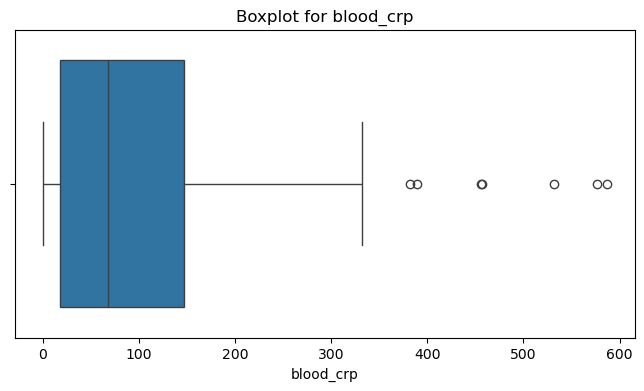


🔍 Outlier Summary for **blood_crp**
Q1: 17.5
Q3: 146.4
IQR: 128.9
Lower Bound: -175.85000000000002
Upper Bound: 339.75

Total Outliers: 7

📌 Outlier Values (Series):


15423     576.2
22431     456.0
23191     456.9
27744     381.5
39519     531.3
110629    586.6
149231    389.0
Name: blood_crp, dtype: float64


📌 Outlier Values (Python List):
[576.2, 456.0, 456.9, 381.5, 531.3, 586.6, 389.0]


[576.2, 456.0, 456.9, 381.5, 531.3, 586.6, 389.0]

In [175]:
plot_box_and_outliers(df, 'blood_crp')

In [176]:
# Ensure numeric
df["blood_crp"] = pd.to_numeric(df["blood_crp"], errors="coerce")

# Invalidate impossible / corrupted CRP values
df.loc[
    (df["blood_crp"] < 0) |
    (df["blood_crp"] > 300) |          # physiologic upper bound
    (~np.isfinite(df["blood_crp"])),
    "blood_crp"
] = np.nan

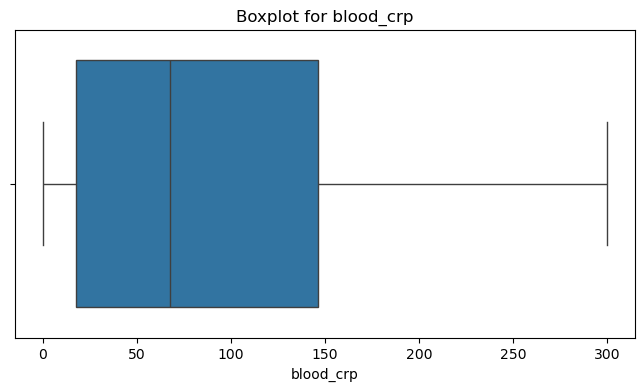


🔍 Outlier Summary for **blood_crp**
Q1: 17.5
Q3: 146.2
IQR: 128.7
Lower Bound: -175.54999999999998
Upper Bound: 339.25

Total Outliers: 0

📌 Outlier Values (Series):


Series([], Name: blood_crp, dtype: float64)


📌 Outlier Values (Python List):
[]


[]

In [177]:
plot_box_and_outliers(df, 'blood_crp')

## urine_output_ml Outlier Detection

In [179]:
# Detect invalid urine output values
uo = pd.to_numeric(df["urine_output_ml"], errors="coerce")

neg = df[uo < 0][["urine_output_ml"]]
too_high = df[uo > 20000][["urine_output_ml"]]

print("Negative urine_output values :", len(neg))
print("Indices:", neg.index.tolist())
print("Values :", neg["urine_output_ml"].tolist(), "\n")

print("Urine_output > 20000 mL/day :", len(too_high))
print("Indices:", too_high.index.tolist())
print("Values :", too_high["urine_output_ml"].tolist())

Negative urine_output values : 0
Indices: []
Values : [] 

Urine_output > 20000 mL/day : 0
Indices: []
Values : []


In [180]:
uo = pd.to_numeric(df["urine_output_ml"], errors="coerce")

# Define ranges
normal = uo.between(800, 2000, inclusive="both")
polyuria = uo > 3000
severe_polyuria = uo > 5000
extreme_polyuria = uo > 8000
critical = uo > 10000

# Print counts
print("Normal (800–2000 mL/day):", normal.sum())
print("Polyuria (>3000):", polyuria.sum())
print("Severe Polyuria (>5000):", severe_polyuria.sum())
print("Extreme Polyuria (>8000):", extreme_polyuria.sum())
print("Critical (>10000):", critical.sum())

Normal (800–2000 mL/day): 4428
Polyuria (>3000): 981
Severe Polyuria (>5000): 206
Extreme Polyuria (>8000): 16
Critical (>10000): 4


## cfu_count Outlier analysis

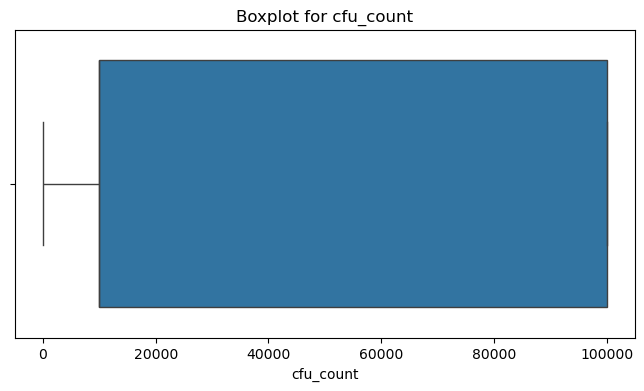


🔍 Outlier Summary for **cfu_count**
Q1: 10000.0
Q3: 100000.0
IQR: 90000.0
Lower Bound: -125000.0
Upper Bound: 235000.0

Total Outliers: 0

📌 Outlier Values (Series):


Series([], Name: cfu_count, dtype: float64)


📌 Outlier Values (Python List):
[]


[]

In [182]:
plot_box_and_outliers(df, 'cfu_count')

## temperature Outlier Detection

In [184]:
temps = pd.to_numeric(df["temperature"], errors="coerce")

invalid_low = temps[temps < 80]         # Impossible low
hypothermia = temps[(temps >= 80) & (temps < 95)]
hyperpyrexia = temps[temps > 105]       # Severe fever
invalid_high = temps[temps > 108]       # Physiologically impossible

print("Impossible low (<80°F):", invalid_low.tolist())
print("Hypothermia (80–95°F):", hypothermia.tolist())
print("Hyperpyrexia (>105°F):", hyperpyrexia.tolist())
print("Impossible high (>108°F):", invalid_high.tolist())


Impossible low (<80°F): [35.8, 33.7, 35.8, 36.7, 32.5, 38.4, 35.3, 36.5, 34.0, 29.9, 34.4, 34.3, 37.0, 37.1, 36.4, 34.0, 35.3, 36.8, 36.0, 37.0, 30.8, 36.8, 35.3, 32.6, 34.8, 34.8, 36.4, 36.4, 35.9, 34.7, 39.3, 37.4, 34.2, 36.4, 37.4, 33.4, 33.7]
Hypothermia (80–95°F): [94.82, 89.6, 92.84, 94.1, 91.3, 91.76, 92.3, 94.0, 93.4, 94.1, 90.32, 94.6, 91.9, 92.12, 94.1, 90.86, 93.02, 93.4, 94.46, 92.12, 93.92, 92.0, 89.96000000000001, 87.44, 93.02, 89.41999999999999, 88.16, 86.36, 94.46, 87.9, 90.0, 93.56, 93.02, 92.66, 90.14, 92.0, 90.32, 94.82, 93.38, 94.6, 93.0, 92.84, 92.0, 93.56, 93.3, 94.64, 94.3, 92.3, 92.9, 92.48, 91.22, 92.66, 93.38, 89.6, 92.3, 93.2, 93.74, 93.7, 94.46, 93.2, 89.96000000000001, 92.8, 93.74, 94.1, 93.38, 94.46, 92.84, 93.74, 94.64, 92.66, 85.82, 91.94, 93.02, 88.7, 89.96000000000001, 93.5, 94.0, 87.9, 94.28, 92.7, 93.3, 93.0, 93.74, 94.46, 93.0, 93.02, 92.8, 94.1, 93.74, 89.24, 93.56, 93.7, 92.3, 93.56, 93.38, 93.02, 91.6, 93.2, 91.4, 91.94, 93.92, 91.8, 86.72, 92.3,

In [185]:
import numpy as np
import pandas as pd

# Convert to numeric (Fahrenheit values)
temps = pd.to_numeric(df["temperature"], errors="coerce")

# --- Detect impossible values BEFORE fixing ---
impossible_low = temps[temps < 80].tolist()
impossible_high = temps[temps > 108].tolist()

print("Impossible low (<80°F):", impossible_low)
print("Impossible high (>108°F):", impossible_high)

# --- Clean values ---
temps = temps.mask(temps < 80, np.nan)   # Impossible low → NaN
temps = temps.mask(temps > 108, 108)     # Impossible high → set to 108°F

# Overwrite original column in Fahrenheit
df["temperature"] = temps


Impossible low (<80°F): [35.8, 33.7, 35.8, 36.7, 32.5, 38.4, 35.3, 36.5, 34.0, 29.9, 34.4, 34.3, 37.0, 37.1, 36.4, 34.0, 35.3, 36.8, 36.0, 37.0, 30.8, 36.8, 35.3, 32.6, 34.8, 34.8, 36.4, 36.4, 35.9, 34.7, 39.3, 37.4, 34.2, 36.4, 37.4, 33.4, 33.7]
Impossible high (>108°F): [979.0, 147.56, 109.6, 980.0, 108.5, 976.0, 977.0, 110.4, 108.5, 981.0, 109.5, 985.0, 108.5, 108.14, 130.1, 108.86, 979.0, 108.5, 108.5, 140.93, 120.66]


In [186]:
temps = pd.to_numeric(df["temperature"], errors="coerce")

invalid_low = temps[temps < 80]         # Impossible low
hypothermia = temps[(temps >= 80) & (temps < 95)]
hyperpyrexia = temps[temps > 105]       # Severe fever
invalid_high = temps[temps > 108]       # Physiologically impossible

print("Impossible low (<80°F):", invalid_low.tolist())
print("Hypothermia (80–95°F):", hypothermia.tolist())
print("Hyperpyrexia (>105°F):", hyperpyrexia.tolist())
print("Impossible high (>108°F):", invalid_high.tolist())


Impossible low (<80°F): []
Hypothermia (80–95°F): [94.82, 89.6, 92.84, 94.1, 91.3, 91.76, 92.3, 94.0, 93.4, 94.1, 90.32, 94.6, 91.9, 92.12, 94.1, 90.86, 93.02, 93.4, 94.46, 92.12, 93.92, 92.0, 89.96000000000001, 87.44, 93.02, 89.41999999999999, 88.16, 86.36, 94.46, 87.9, 90.0, 93.56, 93.02, 92.66, 90.14, 92.0, 90.32, 94.82, 93.38, 94.6, 93.0, 92.84, 92.0, 93.56, 93.3, 94.64, 94.3, 92.3, 92.9, 92.48, 91.22, 92.66, 93.38, 89.6, 92.3, 93.2, 93.74, 93.7, 94.46, 93.2, 89.96000000000001, 92.8, 93.74, 94.1, 93.38, 94.46, 92.84, 93.74, 94.64, 92.66, 85.82, 91.94, 93.02, 88.7, 89.96000000000001, 93.5, 94.0, 87.9, 94.28, 92.7, 93.3, 93.0, 93.74, 94.46, 93.0, 93.02, 92.8, 94.1, 93.74, 89.24, 93.56, 93.7, 92.3, 93.56, 93.38, 93.02, 91.6, 93.2, 91.4, 91.94, 93.92, 91.8, 86.72, 92.3, 90.5, 91.04, 89.41999999999999, 92.8, 92.5, 94.1, 92.84, 92.12, 90.14, 94.2, 90.68, 92.12, 93.74, 92.3, 94.28, 91.76, 93.1, 93.74, 92.66, 91.58, 93.92, 93.3, 94.46, 94.64, 91.0, 93.7, 93.74, 94.1, 90.68, 92.84, 89.96000

## heart_rate Outlier analysis

In [188]:
hr = pd.to_numeric(df["heart_rate"], errors="coerce")

invalid_high = hr[hr > 220]
invalid_low = hr[hr < 40]

print("Invalid HIGH (>220):", invalid_high.tolist())
print("Invalid LOW (<40):", invalid_low.tolist())

Invalid HIGH (>220): [282.0, 230.0, 300.0, 260.0, 300.0, 232.0, 230.0, 275.0, 226.0, 250.0, 230.0, 300.0, 237.0, 300.0, 300.0, 223.0, 300.0, 250.0, 250.0, 238.0, 241.0, 570.0, 300.0, 227.0, 300.0, 300.0, 224.0, 240.0, 247.0, 300.0, 300.0, 232.0, 225.0, 230.0, 229.0, 250.0, 225.0, 260.0, 295.0, 300.0, 227.0, 260.0, 248.0, 239.0, 233.0, 300.0, 270.0, 300.0, 230.0, 250.0, 230.0, 295.0, 236.0, 230.0, 235.0, 300.0, 300.0, 242.0, 241.0, 300.0, 225.0, 255.0, 227.0, 300.0, 227.0, 300.0, 300.0, 300.0, 222.0, 240.0, 229.0, 244.0, 300.0, 230.0, 263.0, 225.0, 289.0, 223.0, 236.0, 300.0, 250.0, 300.0, 255.0, 240.0, 235.0, 300.0, 222.0, 300.0, 230.0, 230.0, 238.0, 300.0, 232.0, 250.0, 230.0, 255.0, 255.0, 252.0, 235.0, 224.0, 231.0, 227.0, 300.0, 300.0, 978.0, 250.0, 223.0, 225.0, 230.0, 300.0, 225.0, 257.0, 223.0, 280.0, 300.0, 235.0, 295.0, 254.0, 227.0, 290.0, 296.0, 247.0, 300.0, 252.0, 242.0, 250.0, 238.0, 261.0, 235.0, 268.0, 295.0, 300.0, 272.0]
Invalid LOW (<40): [35.0, 36.0, 37.0, 16.0, 38.

In [189]:
import numpy as np
import pandas as pd

# Convert to numeric
hr = pd.to_numeric(df["heart_rate"], errors="coerce")

# Cap values
hr_capped = hr.clip(lower=40, upper=220)

# Save back to df
df["heart_rate"] = hr_capped

In [190]:
hr = pd.to_numeric(df["heart_rate"], errors="coerce")

invalid_high = hr[hr > 220]
invalid_low = hr[hr < 40]

print("Invalid HIGH (>220):", invalid_high.tolist())
print("Invalid LOW (<40):", invalid_low.tolist())

Invalid HIGH (>220): []
Invalid LOW (<40): []


## resp_rate outlier Analysis

In [192]:
# Convert to numeric
rr = pd.to_numeric(df["resp_rate"], errors="coerce")

# Invalid low values (<5)
invalid_low = rr[rr < 5].tolist()

# Invalid high values (>40)
invalid_high = rr[rr > 40].tolist()

print("Invalid LOW (<5):", invalid_low)
print("Invalid HIGH (>40):", invalid_high)

Invalid LOW (<5): []
Invalid HIGH (>40): [52.0, 45.0, 44.0, 48.0, 41.0, 41.0, 43.0, 43.0, 43.0, 42.0, 56.0, 42.0, 41.0, 54.0, 43.0, 63.0, 46.0, 44.0, 42.0, 42.0, 63.0, 45.0, 58.0, 46.0, 57.0, 47.0, 42.0, 45.0, 42.0, 42.0, 41.0, 46.0, 46.0, 44.0, 44.0, 41.0, 47.0, 43.0, 47.0, 52.0, 69.0, 51.0, 44.0, 47.0, 45.0, 44.0, 60.0, 46.0, 68.0, 44.0, 187.0, 42.0, 71.0, 66.0, 59.0, 44.0, 46.0, 42.0, 59.0, 50.0, 46.0, 41.0, 42.0, 47.0, 49.0, 56.0, 51.0, 42.0, 52.0, 52.0, 48.0, 60.0, 50.0, 50.0, 42.0, 48.0, 50.0, 44.0, 57.0, 47.0, 76.0, 44.0, 63.0, 42.0, 42.0, 45.0, 44.0, 41.0, 76.0, 54.0, 42.0, 45.0, 44.0, 44.0, 41.0, 53.0, 65.0, 42.0, 53.0, 42.0, 44.0, 48.0, 42.0, 62.0, 49.0, 52.0, 41.0, 42.0, 41.0, 42.0, 68.0, 44.0, 41.0, 47.0, 42.0, 53.0, 48.0, 42.0, 44.0, 41.0, 48.0, 44.0, 52.0, 44.0, 45.0, 45.0, 75.0, 42.0, 43.0, 51.0, 70.0, 45.0, 42.0, 62.0, 46.0, 45.0, 69.0, 45.0, 43.0, 50.0, 47.0, 50.0, 45.0, 41.0, 58.0, 48.0, 43.0, 44.0, 48.0, 48.0, 53.0, 41.0, 44.0, 49.0, 56.0, 45.0, 43.0, 46.0, 41.0, 54.

In [193]:
import pandas as pd

# Convert to numeric
rr = pd.to_numeric(df["resp_rate"], errors="coerce")

# Cap lower bound (<5) → 5
rr = rr.clip(lower=5)

# Cap upper bound (>40) → 40
rr = rr.clip(upper=40)

# Save back to dataframe
df["resp_rate"] = rr

In [194]:
# Convert to numeric
rr = pd.to_numeric(df["resp_rate"], errors="coerce")

# Invalid low values (<5)
invalid_low = rr[rr < 5].tolist()

# Invalid high values (>40)
invalid_high = rr[rr > 40].tolist()

print("Invalid LOW (<5):", invalid_low)
print("Invalid HIGH (>40):", invalid_high)

Invalid LOW (<5): []
Invalid HIGH (>40): []


## o2sat Outlier Detection

In [196]:
spo2 = pd.to_numeric(df["o2sat"], errors="coerce")

invalid_spo2 = spo2[(spo2 < 70) | (spo2 > 100)]

print("Invalid SpO2 values:", invalid_spo2.tolist())

Invalid SpO2 values: [53.0, 69.0, 64.0, 69.0, 56.0, 60.0, 54.0, 64.0, 64.0, 53.0, 53.0, 67.0, 51.0, 61.0, 59.0, 51.0, 50.0, 52.0, 64.0, 69.0, 68.0, 64.0, 61.0, 63.0, 56.0, 50.0, 52.0, 69.0, 66.0, 50.0, 66.0, 55.0, 53.0, 67.0, 64.0, 55.0, 54.0, 54.0, 55.0, 59.0, 50.0, 63.0, 59.0, 69.0, 50.0, 59.0, 53.0, 60.0, 51.0, 58.0, 69.0, 68.0, 65.0, 69.0, 58.0, 61.0, 67.0, 57.0, 61.0, 59.0, 52.0, 59.0, 66.0, 50.0, 68.0, 60.0, 53.0, 55.0, 52.0, 54.0, 64.0, 62.0, 50.0, 67.0, 53.0, 63.0, 52.0, 62.0, 62.0, 69.0, 68.0, 56.0, 60.0, 69.0, 69.0, 62.0, 59.0, 61.0, 50.0, 54.0, 67.0, 57.0, 59.0, 67.0, 62.0, 57.0, 69.0, 63.0, 50.0, 66.0, 61.0, 54.0, 68.0, 68.0, 68.0, 65.0, 64.0, 66.0, 68.0, 58.0, 63.0, 64.0, 52.0, 59.0, 63.0, 65.0, 69.0, 65.0, 63.0, 56.0, 61.0, 55.0, 53.0, 65.0, 51.0, 65.0, 60.0, 65.0, 52.0, 65.0, 53.0, 60.0, 59.0, 55.0, 69.0, 61.0, 57.0, 57.0, 69.0, 51.0, 51.0, 64.0, 64.0, 61.0, 53.0, 55.0, 63.0, 62.0, 55.0, 50.0, 68.0, 64.0, 63.0, 59.0, 63.0, 61.0, 67.0, 61.0, 68.0, 65.0, 69.0, 68.0, 60.0, 

In [197]:
# Convert to numeric
o2 = pd.to_numeric(df["o2sat"], errors="coerce")

# Cap lower bound (<70%) → 70
o2 = o2.clip(lower=70)

# Cap upper bound (>100%) → 100
o2 = o2.clip(upper=100)

# Save back to DataFrame
df["o2sat"] = o2


In [198]:
spo2 = pd.to_numeric(df["o2sat"], errors="coerce")

invalid_spo2 = spo2[(spo2 < 70) | (spo2 > 100)]

print("Invalid SpO2 values:", invalid_spo2.tolist())


Invalid SpO2 values: []


## BP_systolic Outlier Detection

In [200]:
# Convert to numeric
sbp = pd.to_numeric(df["BP_systolic"], errors="coerce")

# Find invalid low (<60)
invalid_low = sbp[sbp < 60].tolist()

# Find invalid high (>250)
invalid_high = sbp[sbp > 250].tolist()

print("Invalid LOW (<60):", invalid_low)
print("Invalid HIGH (>250):", invalid_high)


Invalid LOW (<60): [57.625, 18.0, 16.5, 0.0, 58.0, 6.0, 20.0, 34.5, 56.0, 36.8, 55.642857, 36.0, 16.0, 35.2, 57.0, 59.0, 54.705883, 59.0, 44.333332, 59.863636, 54.875, 49.0, 49.76923, 54.285713, 16.0, 42.5, 17.272728, -10.5, 55.285713, 36.0, 8.0, 6.0, 57.0, 2.0, 56.0, 56.75, 58.75, -17.0, 31.733334, -18.5, 58.0, 48.9, 52.0, 44.0, 46.333332, 18.0, 56.333332, 52.0, 54.0, 59.657143, 50.0, 48.95652, 40.333332, 58.8, 34.166668]
Invalid HIGH (>250): [423.81082, 806.3358, 269.15, 354.2701, 316.19223]


In [201]:
# Convert to numeric
sbp = pd.to_numeric(df["BP_systolic"], errors="coerce")

# Cap lower bound (<60) → 60
sbp = sbp.clip(lower=60)

# Cap upper bound (>250) → 250
sbp = sbp.clip(upper=250)

# Save back
df["BP_systolic"] = sbp


In [202]:
# Convert to numeric
sbp = pd.to_numeric(df["BP_systolic"], errors="coerce")

# Find invalid low (<60)
invalid_low = sbp[sbp < 60].tolist()

# Find invalid high (>250)
invalid_high = sbp[sbp > 250].tolist()

print("Invalid LOW (<60):", invalid_low)
print("Invalid HIGH (>250):", invalid_high)

Invalid LOW (<60): []
Invalid HIGH (>250): []


## BP_diastolic Outlier Detection

In [204]:
import pandas as pd

# Convert to numeric
dbp = pd.to_numeric(df["BP_diastolic"], errors="coerce")

# Define invalid ranges
invalid_low = dbp[dbp < 40]          # physiologically too low
invalid_high = dbp[dbp > 130]        # physiologically too high

# Print results
print("Invalid LOW (<40):", len(invalid_low))
print("Values:", invalid_low.tolist(), "\n")

print("Invalid HIGH (>130):", len(invalid_high))
print("Values:", invalid_high.tolist())

Invalid LOW (<40): 679
Values: [39.640564, 32.0, 38.444443, 33.2, 37.77778, 38.6, 35.0, 38.966103, 34.42995, 38.0, 39.761734, 26.666666, 28.096775, 36.0, 35.31818, 37.0, 22.142857, 38.71875, 35.583332, 35.826088, 30.0, 39.0, 38.0, 14.333333, 38.789474, 35.0, 36.488373, 11.0, 39.0, 39.085712, 39.666668, 38.0, 31.0, 39.0, 35.0, 38.95652, 38.090908, 38.0, 39.0, 38.60241, 31.333334, 39.112675, 39.0, 0.0, 33.0, 22.0, 36.6, 39.82895, 36.515873, 39.0, 9.0, 9.0, 39.17021, 36.0, 39.909092, 32.0, 31.0, 38.0, 39.875, 38.46154, 39.810345, 38.666668, 31.0, 31.0, 33.4, 32.763638, 39.0, 38.0, 38.0, 35.12766, 39.640625, 30.333334, 0.0, -5.0, 15.0, 32.357143, 27.855263, 37.0, 31.0, 23.0, 33.0, 39.0, 38.545456, 39.51613, 39.919674, 36.47059, 38.044777, 32.833332, 38.346153, 19.0, 23.0, 38.0, 34.0, 21.4, 37.0, 38.0, 25.0, 34.0, 36.820515, 34.07143, 39.0, 37.0, 38.942856, 38.0, 24.0, 37.0, 36.26829, 34.0, 36.888237, 39.0, 33.0, 38.0, 33.785713, 36.40996, 27.157894, 38.0, 38.0, 39.7551, 37.4, 34.0, 35.0, 3

In [205]:
import pandas as pd

# Convert to numeric
dbp = pd.to_numeric(df["BP_diastolic"], errors="coerce")

# Save invalid values BEFORE fixing (optional)
invalid_low_before = dbp[dbp < 40]
invalid_high_before = dbp[dbp > 130]

# --- CAP VALUES ---
dbp = dbp.clip(lower=40, upper=130)

# Save back to dataframe
df["BP_diastolic"] = dbp

In [206]:
# Convert to numeric
dbp = pd.to_numeric(df["BP_diastolic"], errors="coerce")

# Define invalid ranges
invalid_low = dbp[dbp < 40]          # physiologically too low
invalid_high = dbp[dbp > 130]        # physiologically too high

# Print results
print("Invalid LOW (<40):", len(invalid_low))
print("Values:", invalid_low.tolist(), "\n")

print("Invalid HIGH (>130):", len(invalid_high))
print("Values:", invalid_high.tolist())

Invalid LOW (<40): 0
Values: [] 

Invalid HIGH (>130): 0
Values: []


In [207]:
output_path = r"C:\Users\Coditas\Desktop\Projects\Cauti\silver\bronze_outliers_handled.csv"

df.to_csv(output_path, index=False)

print("Saved to:", output_path)

Saved to: C:\Users\Coditas\Desktop\Projects\Cauti\silver\bronze_outliers_handled.csv
